## **Unsupervised Learning Homework**


In [2]:
import logging
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder
)
from sklearn.pipeline import Pipeline
from sklearn.decomposition import (
    PCA,
    FastICA
)
from sklearn.cluster import KMeans
from sklearn.manifold import (
    MDS,
    TSNE
)
from sklearn.datasets import load_iris
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [3]:
url = ('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df_raw = pd.read_csv(url)
df_raw = df_raw[['Latitude', 'Longitude', 'MedInc']]
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [4]:
df_raw.sample(10, random_state=2025)

,Latitude,Longitude,MedInc
8651,33.86,-118.39,4.8971
3034,35.39,-119.12,4.5903
2918,35.36,-119.04,3.0435
12884,38.66,-121.34,1.9805
13325,34.06,-117.63,2.3636
2045,36.73,-119.73,1.4007
9331,37.97,-122.50,2.7273
16647,35.27,-120.65,4.2411
8892,34.02,-118.50,2.9934
18177,37.36,-122.00,8.6155


In [5]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.replace("(", "").str.replace(")", "").str.replace(" ", "_")
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   20640 non-null  float64
 1   Longitude  20640 non-null  float64
 2   MedInc     20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [6]:
df_train, df_test =  train_test_split(df, test_size=0.2, random_state=2025)
df_train

,Latitude,Longitude,MedInc
18678,36.94,-121.84,4.9517
4279,34.09,-118.31,1.8576
17975,37.31,-121.96,5.2534
2780,32.80,-114.55,1.2750
16419,37.90,-121.31,2.9000
...,...,...,...
5331,34.04,-118.46,3.2663
16707,35.17,-120.43,3.8510
15948,37.73,-122.43,3.8934
11102,33.85,-117.88,3.7772


In [7]:
X_train = df_train.drop(columns=['MedInc']).reset_index(drop=True)
y_train = df_train['MedInc'].reset_index(drop=True)
X_test = df_test.drop(columns=['MedInc']).reset_index(drop=True)
y_test = df_test['MedInc'].reset_index(drop=True)
X_train

,Latitude,Longitude
0,36.94,-121.84
1,34.09,-118.31
2,37.31,-121.96
3,32.80,-114.55
4,37.90,-121.31
...,...,...
16507,34.04,-118.46
16508,35.17,-120.43
16509,37.73,-122.43
16510,33.85,-117.88


In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,16512.0,35.622521,2.134124,32.5400,33.9300,34.2500,37.71000,41.9500
Longitude,16512.0,-119.560614,2.003636,-124.3500,-121.7900,-118.4900,-118.00000,-114.3100
MedInc,16512.0,3.869547,1.898848,0.4999,2.5625,3.5334,4.75495,15.0001


In [9]:
print(X_train.isnull().sum())

Latitude     0
Longitude    0
dtype: int64


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

pca_ = PCA(n_components=2,random_state=2025)
X_train_pca = pca_.fit_transform(X_train_scaled)

In [11]:
pca_.explained_variance_

array([1.9242929 , 0.07582823])

In [12]:
pca_.explained_variance_ratio_

array([0.96208818, 0.03791182])

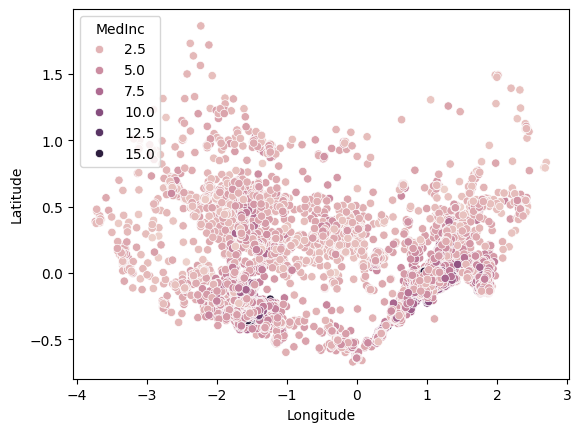

In [13]:
df_X_train_pca = pd.DataFrame(X_train_pca,columns=['Longitude','Latitude'])
df_X_train_pca['MedInc'] = y_train
sns.scatterplot(df_X_train_pca, x='Longitude', y='Latitude', hue='MedInc')
plt.show()

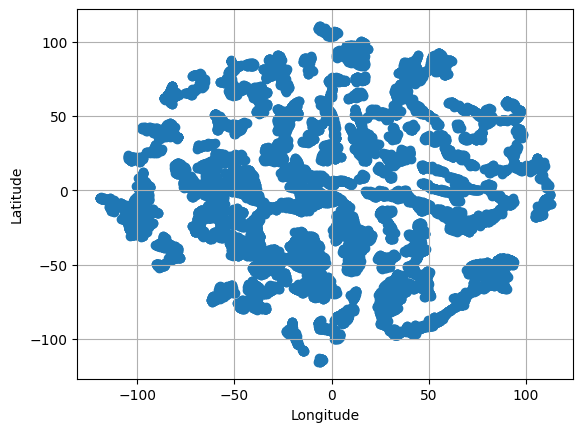

In [24]:
tsne_ = TSNE(n_components=2, random_state=2025)
X_train_tsne = tsne_.fit_transform(X_train)
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.grid(True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

---------------------------

In [ ]:
mds_ = MDS(n_components=2, random_state=2025)
X_train_mds = mds_.fit_transform(X_train)
plt.scatter(X_train_mds[:,0], X_train_mds[:,1])
plt.grid(True)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Tried Running this ^^^^^^^ Multiple times, kept killing my kernel

In [14]:
clu_km_p = Pipeline([
    ("scaler", MinMaxScaler()),
    ("k_means", KMeans(n_clusters=3))
])

In [15]:
clu_km_p.fit(X_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('k_means', KMeans(n_clusters=3))])

In [16]:
y_train_km = clu_km_p.predict(X_train)
y_train_km


array([0, 1, 0, ..., 0, 1, 0], shape=(16512,), dtype=int32)

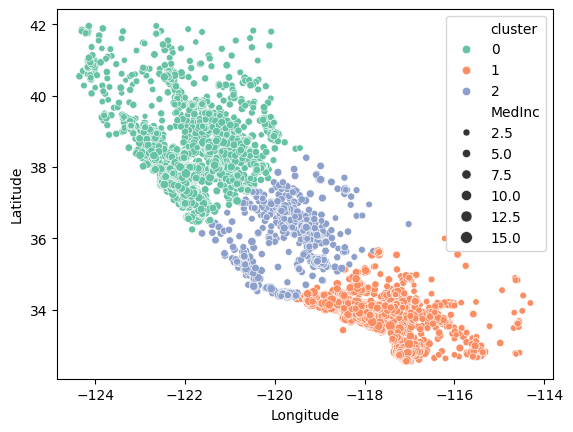

In [20]:

df_clu = X_train.copy()  
df_clu['cluster'] = y_train_km  
df_clu['MedInc'] = y_train  


sns.scatterplot(data=df_clu, x='Longitude', y='Latitude', hue='cluster', size='MedInc', palette='Set2')
plt.show()
